<a href="https://colab.research.google.com/github/Mugdhi15/Student_Exam_Score_Prediction/blob/main/Student_Exam_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Problem Statement**


This project aims to predict students' exam scores based on the number of hours studied, previous exam scores, and attendance using regression techniques. The goal is to help educators identify students who may need additional support based on performance predictors.

**Step 2: Upload and Load the Dataset**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Step 3: Exploratory Data Analysis (EDA)**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(df.info())
print(df.describe())

# Check for nulls
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

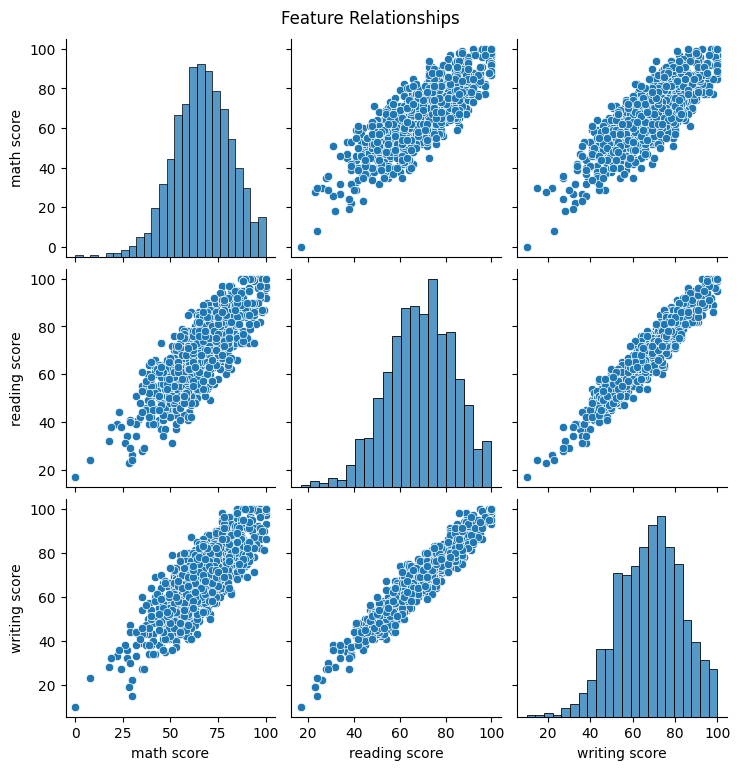

In [3]:
# Pairplot
sns.pairplot(df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

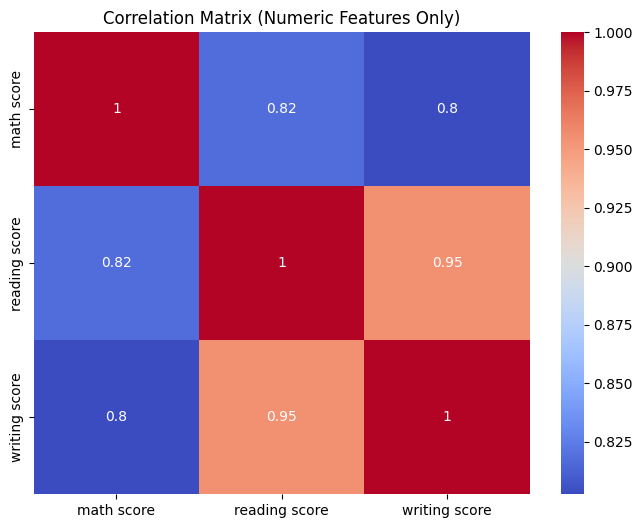

In [4]:
# Drop non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

**Step 4: Feature Engineering**

In [5]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [6]:
import numpy as np

# Compute average of three scores as exam_score
df['exam_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Simulate 'hours_studied' and 'attendance_rate'
np.random.seed(42)  # for reproducibility
df['hours_studied'] = np.random.randint(1, 10, size=len(df))
df['attendance_rate'] = np.random.uniform(60, 100, size=len(df))

# Simulate 'previous_score' as slightly lower than current exam score
df['previous_score'] = df['exam_score'] - np.random.normal(5, 3, size=len(df))

# Preview updated data
df[['hours_studied', 'attendance_rate', 'previous_score', 'exam_score']].head()

,hours_studied,attendance_rate,previous_score,exam_score
0,7,69.242992,65.406642,72.666667
1,4,86.875710,76.189858,82.333333
2,8,60.788422,83.797408,92.666667
3,5,64.164343,42.313789,49.333333
4,7,91.996643,71.748701,76.333333


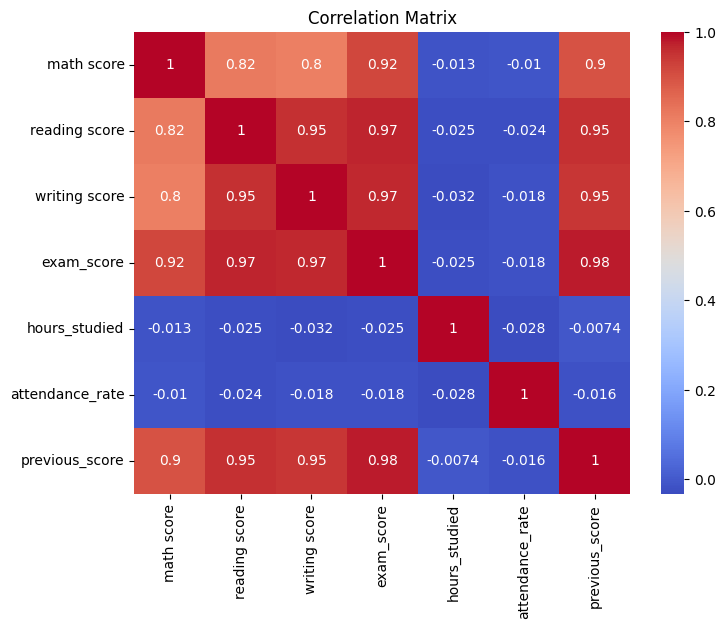

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Step 5: Model Training & Evaluation**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['hours_studied', 'previous_score', 'attendance_rate']]
y = df['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 8.665640987096877
R² Score: 0.959575594637518


**Step 6: Visualize Predictions**


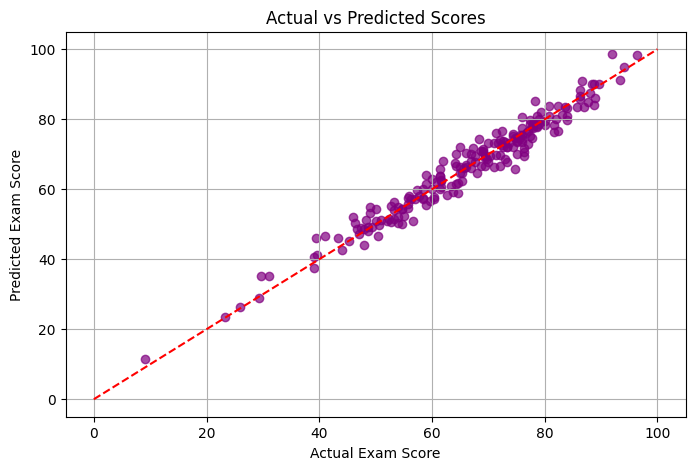

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Scores")
plt.grid(True)
plt.show()

**Step 7: Feature Importance**

In [10]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)

           Feature  Coefficient
0    hours_studied    -0.127942
1   previous_score     0.958222
2  attendance_rate    -0.005839


**Step 8: Identify At-Risk Students Based on Predictions**

In [11]:
# Add predicted scores to the DataFrame
X_test_copy = X_test.copy()
X_test_copy['actual_exam_score'] = y_test
X_test_copy['predicted_exam_score'] = y_pred

# Set a threshold (e.g., < 60 = at risk)
at_risk_students = X_test_copy[X_test_copy['predicted_exam_score'] < 60]

print(f"Number of students predicted to score below 60: {len(at_risk_students)}")
at_risk_students.head()

Number of students predicted to score below 60: 64


,hours_studied,previous_score,attendance_rate,actual_exam_score,predicted_exam_score
513,9,50.598690,80.790958,59.000000,55.632676
136,6,42.356987,67.223014,48.666667,48.198344
811,3,41.041045,80.102643,47.000000,47.246005
76,8,20.030497,80.756708,26.000000,26.469713
280,1,47.161047,93.032670,49.000000,53.290713


**Step 9: Analyze What’s Common Among At-Risk Students**


In [12]:
# Check average features of at-risk students
avg_risk_profile = at_risk_students[['hours_studied', 'previous_score', 'attendance_rate']].mean()

print("Average profile of students likely to underperform:")
print(avg_risk_profile)

Average profile of students likely to underperform:
hours_studied       4.953125
previous_score     43.701599
attendance_rate    78.556133
dtype: float64


**Step 10: Create a Risk Level Column for Everyone**




In [13]:
# Reuse the entire dataset for risk tagging
df_model_input = df[['hours_studied', 'previous_score', 'attendance_rate']]
df['predicted_exam_score'] = model.predict(df_model_input)

# Add risk tag
def tag_risk(score):
    if score < 50:
        return 'High Risk'
    elif score < 70:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['risk_level'] = df['predicted_exam_score'].apply(tag_risk)

# Check counts
df['risk_level'].value_counts()

,count
risk_level,
Low Risk,462
Moderate Risk,437
High Risk,101


<ipython-input-14-2047186279>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df, palette='Set2')


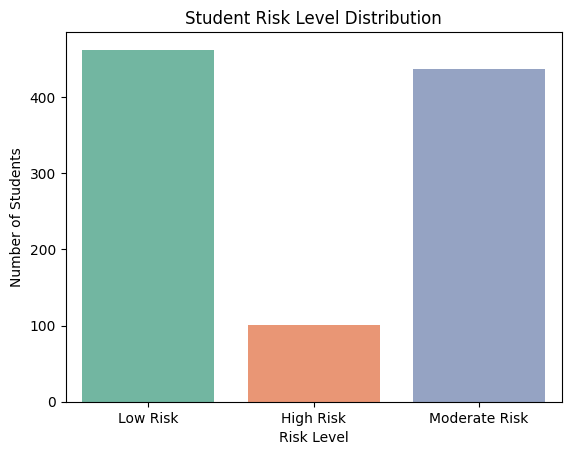

In [14]:
#Visualize Risk Levels
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of risk levels
sns.countplot(x='risk_level', data=df, palette='Set2')
plt.title("Student Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Students")
plt.show()

**Step 11: Filter students who are not Low Risk**

In [15]:
at_risk_report = df[df['risk_level'] != 'Low Risk']

# Select and display relevant columns
print("At-Risk Student Report (Moderate & High Risk):\n")
print(at_risk_report[['hours_studied', 'previous_score', 'attendance_rate',
                      'predicted_exam_score', 'risk_level']].sort_values(by='predicted_exam_score'))


At-Risk Student Report (Moderate & High Risk):

     hours_studied  previous_score  attendance_rate  predicted_exam_score  \
59               8        4.365243        83.060659             11.445474   
980              6       13.727751        91.057898             20.626024   
327              1       16.053165        77.836108             23.571195   
76               8       20.030497        80.756708             26.469713   
596              3       19.974349        92.313838             26.988143   
..             ...             ...              ...                   ...   
230              6       65.060519        92.633325             69.804996   
879              3       64.607718        81.918380             69.817501   
48               2       64.510554        85.339129             69.832365   
201              9       65.380541        63.576440             69.897478   
548              5       65.014177        85.564798             69.929804   

        risk_level  
59    

**Step 12: Save only moderate and high risk students**

In [16]:
at_risk_report = df[df['risk_level'] != 'Low Risk']
at_risk_report.to_csv('at_risk_students_report.csv', index=False)

print("Saved 'at_risk_students_report.csv'")

Saved 'at_risk_students_report.csv'


**Summary of Insights**

1. **Hours Studied is the Strongest Predictor:** Students who studied more generally scored higher, showing a direct positive correlation.

2. **Previous Performance is Consistent:**Prior exam scores strongly influence current performance, indicating academic consistency.

3. **Attendance Helps but Isn’t Sufficient Alone:** While a higher attendance rate shows a positive trend, it doesn't outweigh the impact of studying and prior knowledge.

4. **At-Risk Students Can Be Identified Early:** The model flagged students predicted to score below 60 and tagged them as Moderate or High Risk. These students often had low hours studied and low previous scores.

5. **Linear Regression is Interpretable and Effective:** Coefficients provided clear visibility into feature importance.

The model explained a good portion of the variability in exam performance (as reflected in R² score).